# Brief description of the data set and a summary of its attributes

In this assignment i have used teaching ratings data from University of Texas. Which contains Teachers rating values along with features as teacher being male or female, Tenured or Not Tenured, & Teachers beauty score...etc.
<br> Here is the list of features in the data set.
<table style="width:100%">
    <tr>
        <th>Features</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>minority</td>
        <td>Tells whether Teacher is minor or not. </td>
    </tr><tr>
        <td>age</td>
        <td>Teacher age. </td>
         </tr><tr>
        <td>gender</td>
        <td>Teacher's gender. </td>
         </tr><tr>
        <td>credits</td>
        <td>Specifies Course Credit level. </td>
         </tr><tr>
        <td>beauty</td>
        <td>Beauty Score of Teacher. </td>
         </tr><tr>
        <td>eval</td>
        <td>Overall evaluation Teachers score. </td>
         </tr><tr>
        <td>division</td>
        <td>Specifies Course division. </td>
         </tr><tr>
        <td>native</td>
        <td>Tells whether Teacher is native or not. </td>
         </tr><tr>
        <td>tenure</td>
        <td>Tells whether Teacher is Tenured or not. </td>
         </tr><tr>
        <td>students</td>
        <td>Number of students enrolled for a particular course. </td>
    </tr>
        </table>

In [2]:
!pip install -U seaborn

     |████████████████████████████████| 292 kB 24.1 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import seaborn as sb
import statsmodels.stats.weightstats

In [4]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

In [5]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


# Initial plan for data exploration
We will be using both statistical & Visualization technique for our Exploratory Data Analysis.</br>
    First we start with statistical techniques & we further proceed for Visualization techniques.</br>
    - We see the correlation features that are cosely co-related to our target variable, Here target variable being 'eval'. </br>
    - In Visualization technique we see how features vary with our target variable.

In [6]:
ratings_df.isnull().sum(axis=0)

minority           0
age                0
gender             0
credits            0
beauty             0
eval               0
division           0
native             0
tenure             0
students           0
allstudents        0
prof               0
PrimaryLast        0
vismin             0
female             0
single_credit      0
upper_division     0
English_speaker    0
tenured_prof       0
dtype: int64

#### Below is the list of continuous Feature variables.

In [7]:
ratings_con = ratings_df.columns[ratings_df.dtypes != 'object'].to_list()
print(ratings_con)

['age', 'beauty', 'eval', 'students', 'allstudents', 'prof', 'PrimaryLast', 'vismin', 'female', 'single_credit', 'upper_division', 'English_speaker', 'tenured_prof']


#### Below is the list of categorical Feature variables.

In [8]:
ratings_cat = ratings_df.columns[ratings_df.dtypes == 'object'].to_list()
print(ratings_cat)

['minority', 'gender', 'credits', 'division', 'native', 'tenure']


#### Descriptive statics of continuous variables

In [9]:
ratings_df[ratings_con].describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation matrix for continuous features

In [10]:
ratings_df[ratings_con].corr()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
age,1.000000,-0.297893,-0.051696,-0.030461,-0.012626,0.078193,-0.041844,-0.103120,-0.285088,-0.025277,0.091463,0.002055,-0.098865
beauty,-0.297893,1.000000,0.189039,0.130650,0.099602,0.054353,0.056603,0.033060,0.125719,-0.084704,-0.032577,-0.010293,-0.019135
eval,-0.051696,0.189039,1.000000,0.035467,-0.001229,0.019860,-0.113706,-0.076655,-0.149660,0.235240,-0.115002,0.141435,-0.129527
students,-0.030461,0.130650,0.035467,1.000000,0.972056,0.024911,0.014247,-0.093227,-0.101915,-0.101831,-0.166689,0.081700,0.140066
allstudents,-0.012626,0.099602,-0.001229,0.972056,1.000000,0.030963,0.012770,-0.096993,-0.125560,-0.107882,-0.203698,0.086507,0.151219
prof,0.078193,0.054353,0.019860,0.024911,0.030963,1.000000,0.037945,0.033525,-0.064894,0.203350,-0.459876,-0.054686,0.026793
PrimaryLast,-0.041844,0.056603,-0.113706,0.014247,0.012770,0.037945,1.000000,-0.015456,0.004463,-0.056861,0.021263,-0.029629,0.073955
vismin,-0.103120,0.033060,-0.076655,-0.093227,-0.096993,0.033525,-0.015456,1.000000,0.114642,0.247490,-0.136129,-0.292186,0.061896
female,-0.285088,0.125719,-0.149660,-0.101915,-0.125560,-0.064894,0.004463,0.114642,1.000000,-0.044268,0.056579,-0.003805,-0.074315
single_credit,-0.025277,-0.084704,0.235240,-0.101831,-0.107882,0.203350,-0.056861,0.247490,-0.044268,1.000000,-0.327947,0.024469,-0.290251


#### Features correlation factor on target variable 'eval'

In [11]:
ratings_df[ratings_con].corr()['eval']

age               -0.051696
beauty             0.189039
eval               1.000000
students           0.035467
allstudents       -0.001229
prof               0.019860
PrimaryLast       -0.113706
vismin            -0.076655
female            -0.149660
single_credit      0.235240
upper_division    -0.115002
English_speaker    0.141435
tenured_prof      -0.129527
Name: eval, dtype: float64

#### Number of Categories in Categorical feature columns

In [12]:
ratings_df[ratings_cat].describe()

,minority,gender,credits,division,native,tenure
count,463,463,463,463,463,463
unique,2,2,2,2,2,2
top,no,male,more,upper,yes,yes
freq,399,268,436,306,435,361


#### Scatter plots of continuous features v/s Target variable

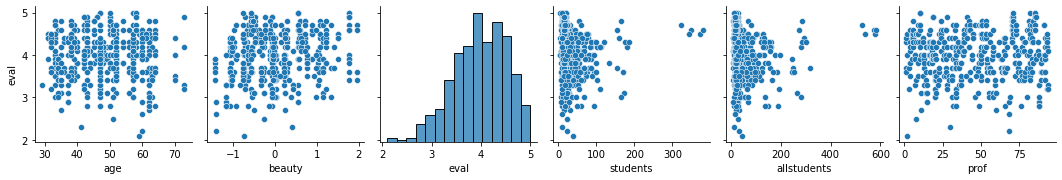

In [13]:
ax = sb.pairplot(ratings_df[ratings_con[0:6]], x_vars=ratings_df[ratings_con[0:6]].columns, y_vars=["eval"])

#### Histogram of Target Variable

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


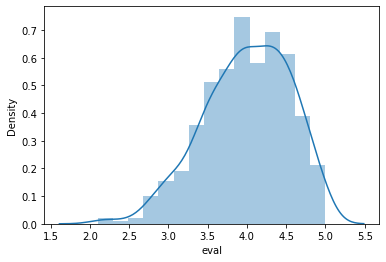

In [14]:
sb.distplot(ratings_df['eval'])
plt.show()

In [15]:
ratings_df.groupby('gender')['eval'].mean()

gender
female    3.901026
male      4.069030
Name: eval, dtype: float64

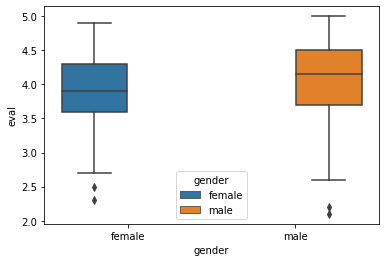

In [48]:
sb.boxplot(x="gender", y="eval", hue="gender", data=ratings_df)
plt.show()

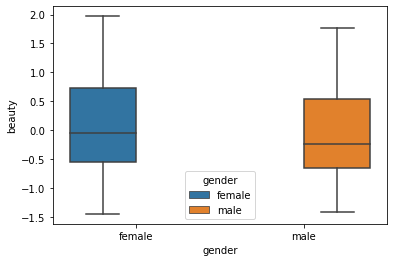

In [17]:
sb.boxplot(x="gender", y="beauty", hue="gender", data=ratings_df)
plt.show()

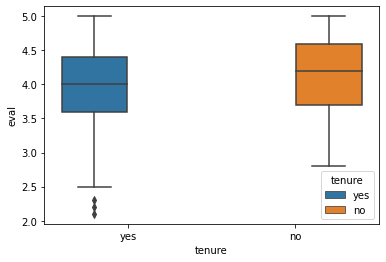

In [18]:
sb.boxplot(x="tenure", y="eval", hue="tenure", data=ratings_df)
plt.show()

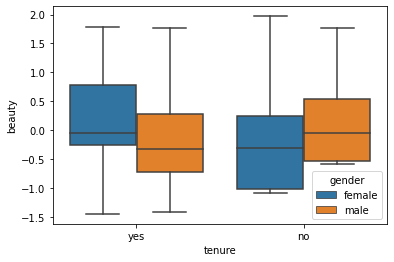

In [19]:
sb.boxplot(x="tenure", y="beauty", hue="gender", data=ratings_df)
plt.show()

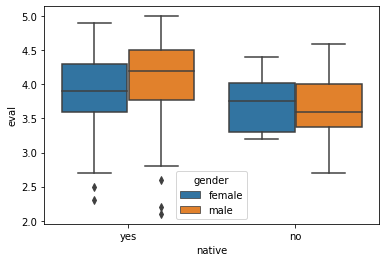

In [20]:
sb.boxplot(x="native", y="eval", hue="gender", data=ratings_df)
plt.show()

In [21]:
for col in ratings_cat:
    print(str(col) + str(ratings_df[ratings_cat][col].unique()))

minority['yes' 'no']
gender['female' 'male']
credits['more' 'single']
division['upper' 'lower']
native['yes' 'no']
tenure['yes' 'no']


# Actions taken for data cleaning and feature engineering

As we go through visualization EDA we found that there are no missing values & Extreme Outliers. Hence none of data wrangling or binning were used.</br>
We have carried out transformation on categorical features to get numerical values. For this pandas get dummy's method has been used.

In [22]:
ratings_df_cat = pd.get_dummies(ratings_df[ratings_cat])
ratings_df_cat.head()

,minority_no,minority_yes,gender_female,gender_male,credits_more,credits_single,division_lower,division_upper,native_no,native_yes,tenure_no,tenure_yes
0,0,1,1,0,1,0,0,1,0,1,0,1
1,0,1,1,0,1,0,0,1,0,1,0,1
2,0,1,1,0,1,0,0,1,0,1,0,1
3,0,1,1,0,1,0,0,1,0,1,0,1
4,1,0,0,1,1,0,0,1,0,1,0,1


# Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

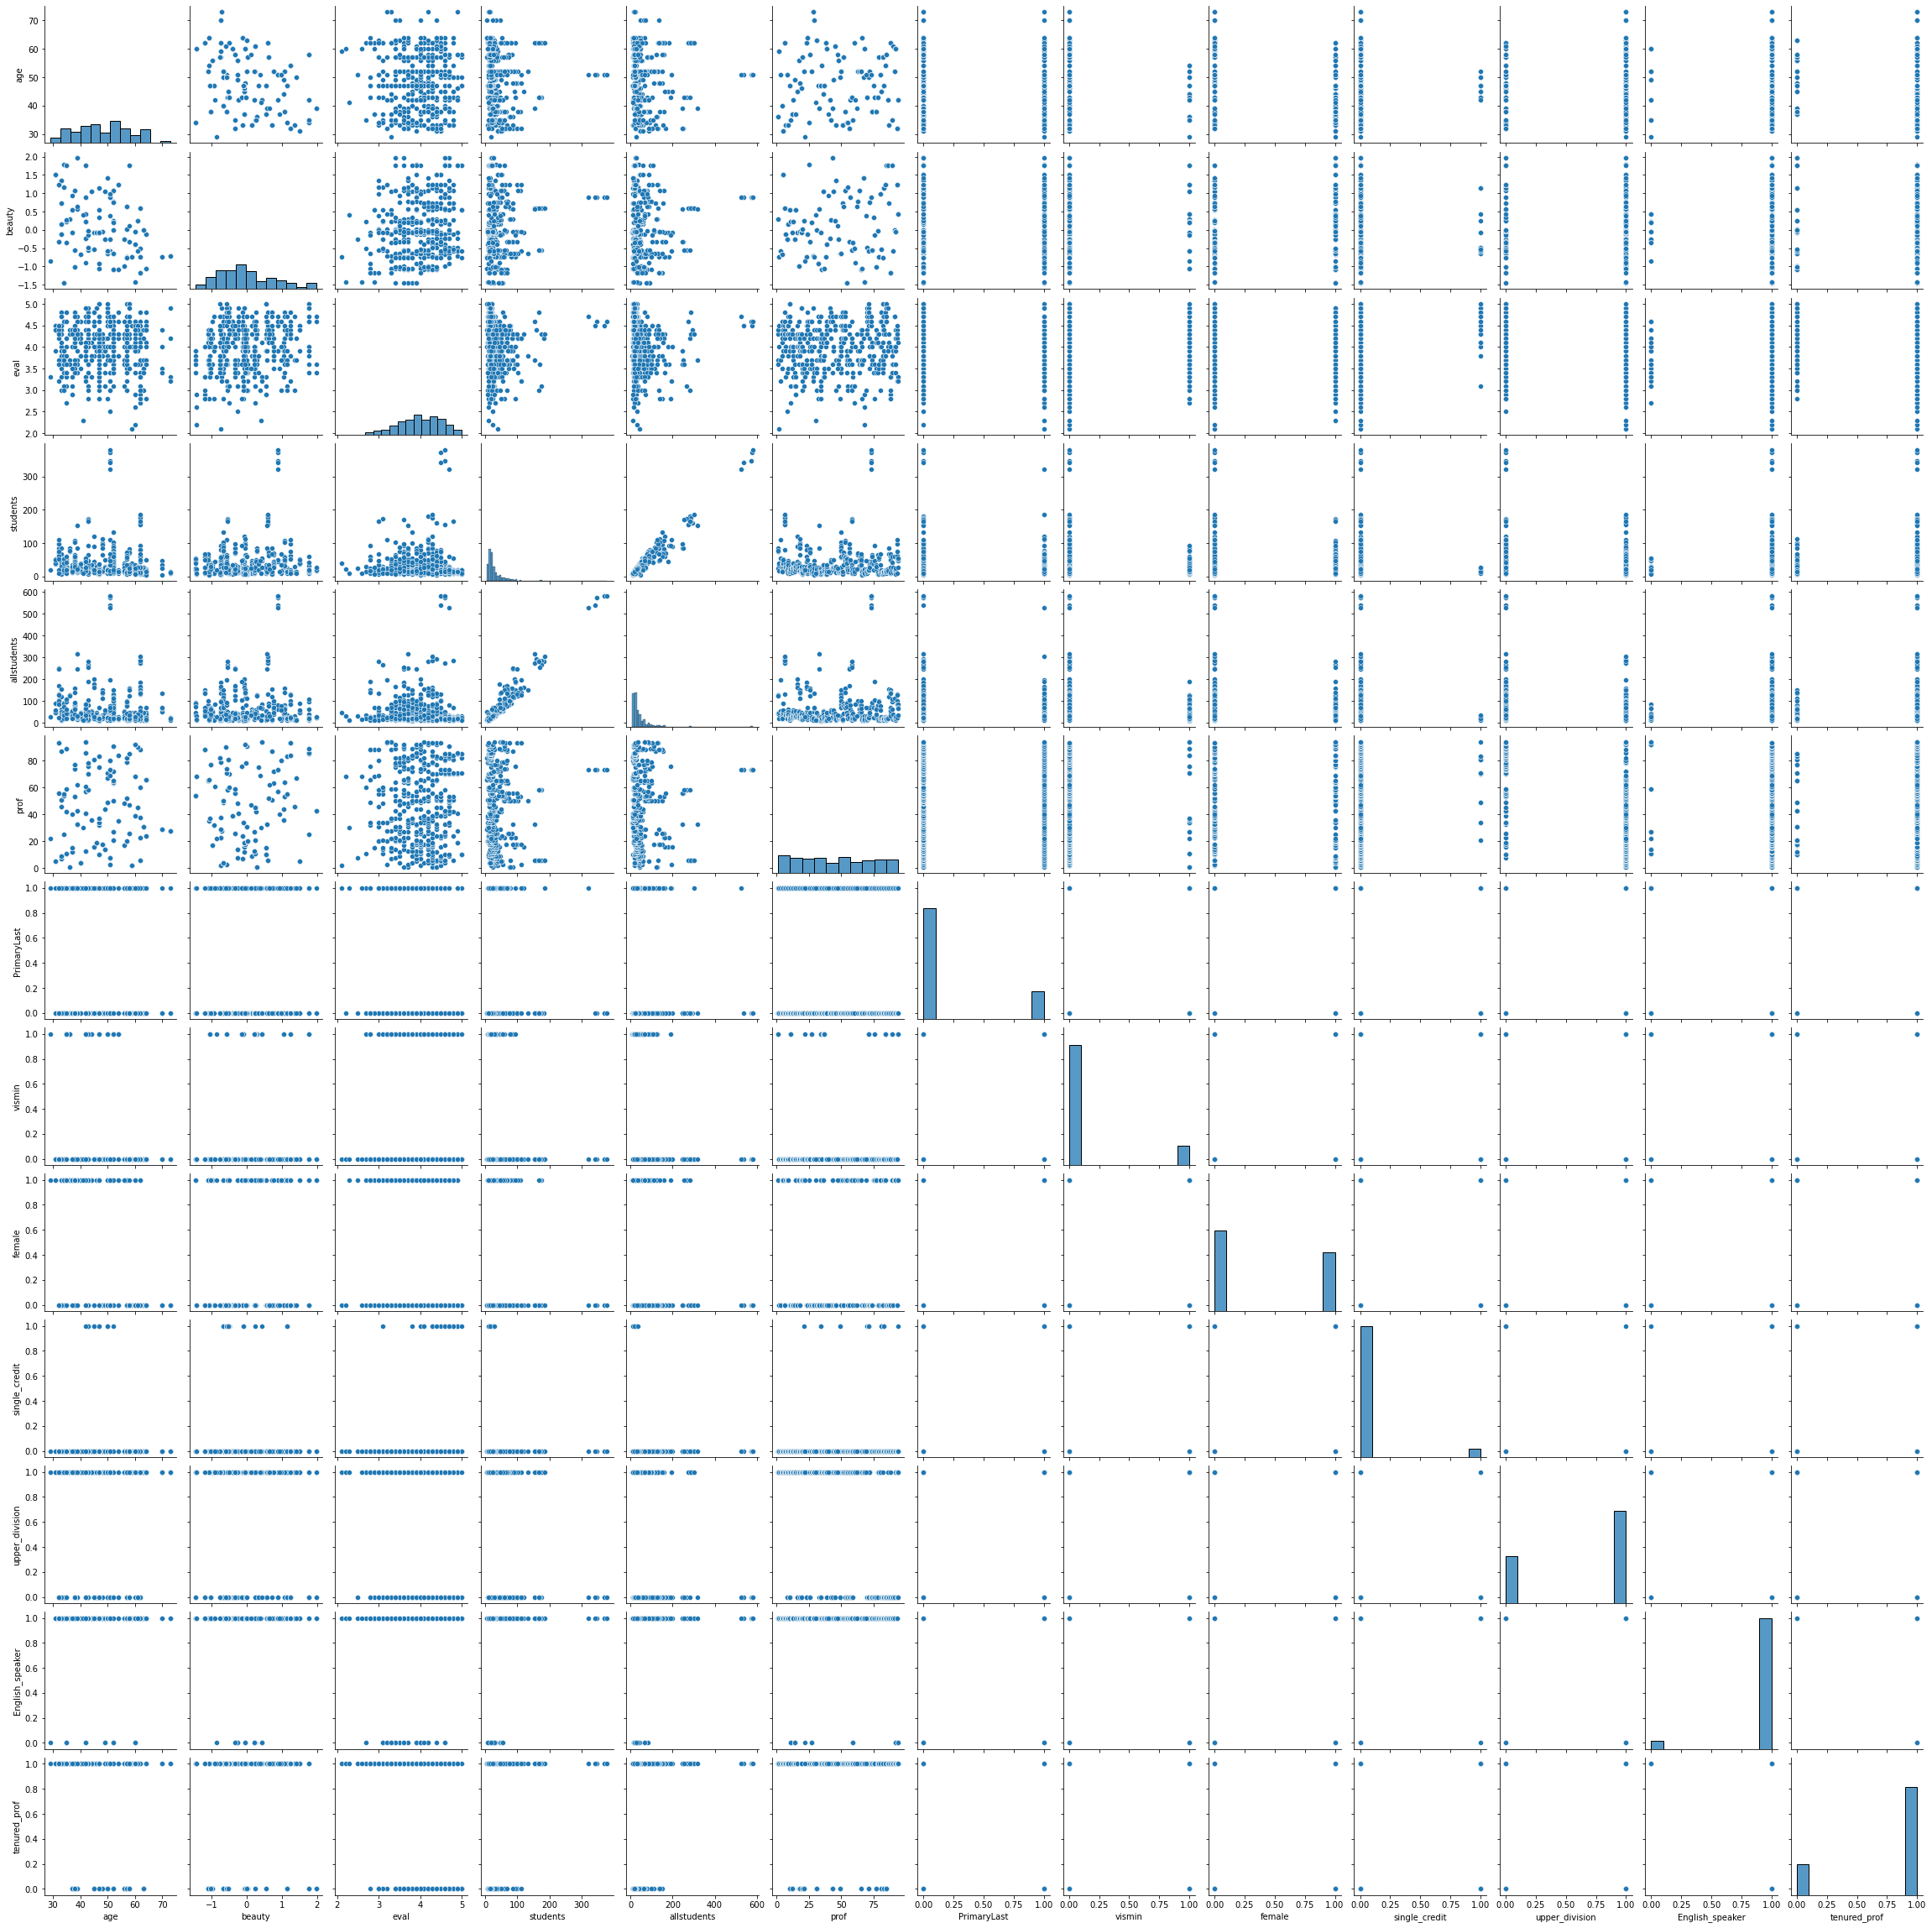

In [141]:
ratings_df_con = ratings_df[ratings_con]
ax = sb.pairplot(ratings_df[ratings_con])
# ax.map_offdiag(sb.distplot)

#### Feature that are least important are been dropped for further analysis

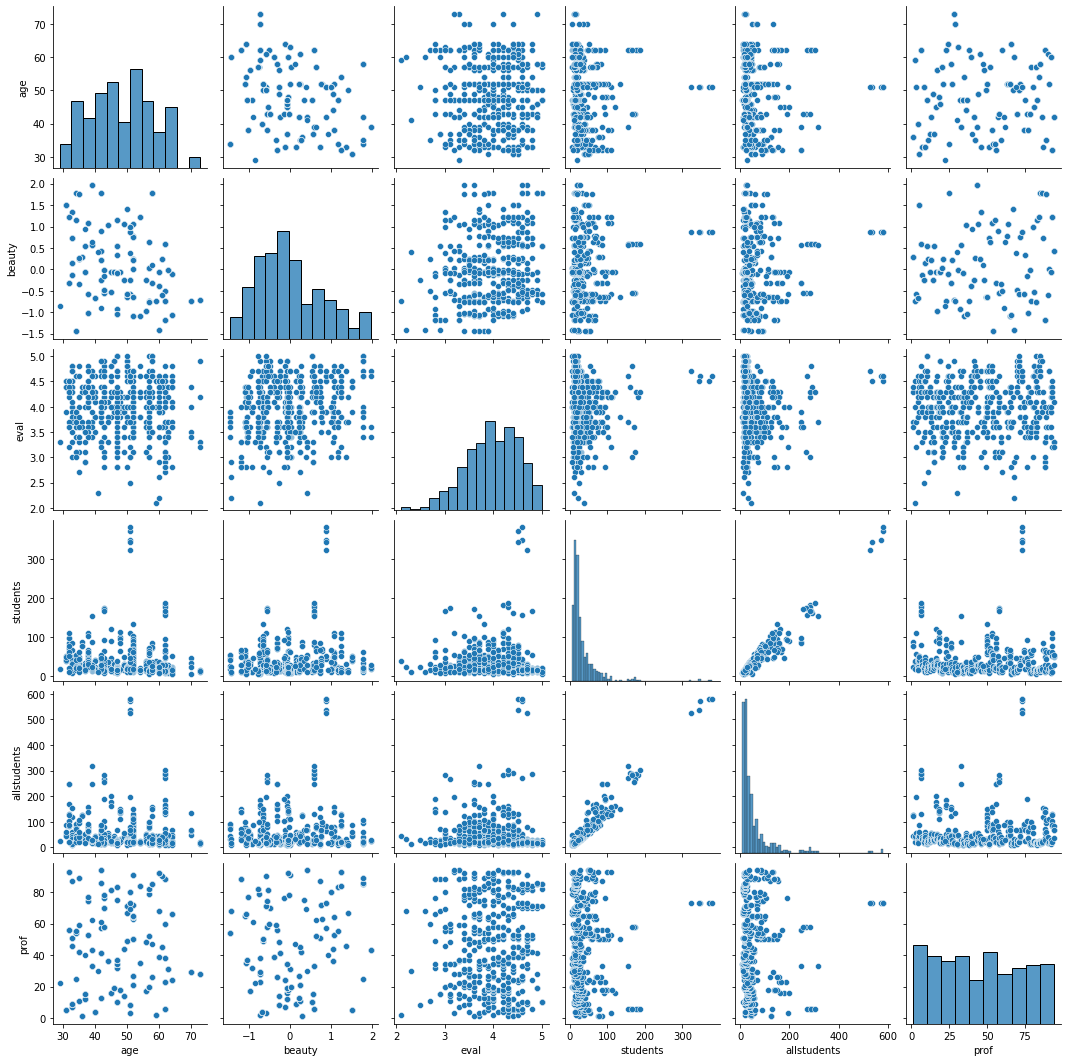

In [140]:
ax = sb.pairplot(ratings_df[ratings_con[0:6]], x_vars=ratings_df[ratings_con[0:6]].columns)

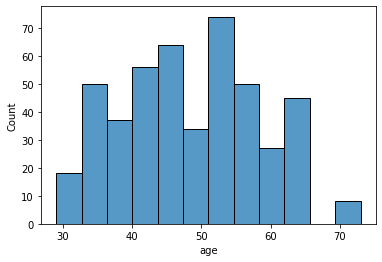

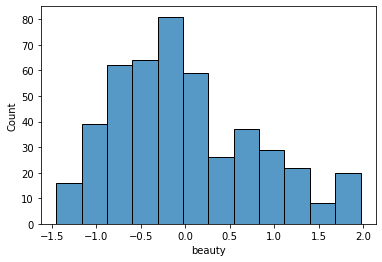

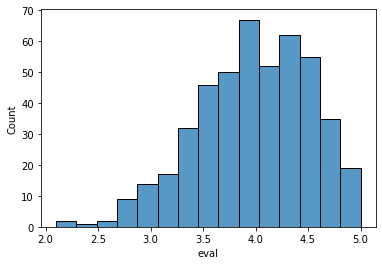

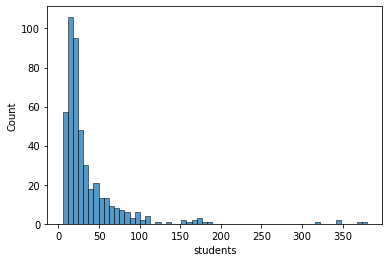

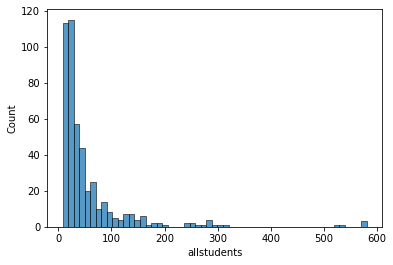

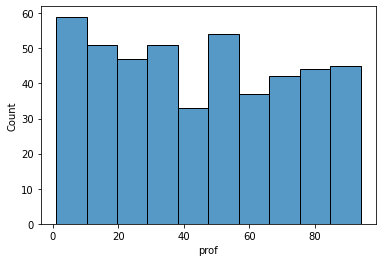

In [24]:
for col in ratings_con[0:6]:
    ax = sb.histplot(ratings_df_con[col])
    plt.show()

**It is found that all Exploratory or independent variables are not normally distributed. Hence our model would require Feature transformation.**

# Formulating at least 3 hypothesis about this data

**1. We check our Target variable distribution since linear regression model would require targeted variable to be normally distributed to get better model with least error.**,<br>
<p>
We state the Hypothesis as below:- <br>
- Null hypothesis being target variable is normally distributed.<br>
- Alternative hypothesis being target variable is not normally distributed.
</p>
We set significance value as 0.05

In [25]:
scipy.stats.kstat(ratings_df_con['eval'])

0.3078758013118725

Since K-Statistics is above our significance value 0.05 we fail to reject null & Accept null hypothesis as the data is normally distributed.

**2. We check if mean of population is equal to mean of sample. where sample is 'eval' corresponding to female.**,<br>
<p>
We state the Hypothesis as below:- <br>
- Null hypothesis being mean of females 'eval' score is equal to population mean.<br>
- Alternative hypothesis being mean of females 'eval' score is not equal to population mean.
</p>
We set significance value as 0.05

In [44]:
statsmodels.stats.weightstats.ztest(ratings_df[ratings_df['gender']=='female']['eval'], value=ratings_df['eval'].mean(), alternative='two-sided')

(-2.5203544480574105, 0.01172367133731521)

Since Z-test-Statistics is below our significance value 0.05 we reject null & Accept alternative hypothesis as the means are significantly different.

**3. We check if mean of population is equal to mean of sample. where sample is 'eval' corresponding to male.**,<br>
<p>
We state the Hypothesis as below:- <br>
- Null hypothesis being mean of males 'eval' score is equal to population mean.<br>
- Alternative hypothesis being mean of males 'eval' score is not equal to population mean.
</p>
We set significance value as 0.05

In [45]:
statsmodels.stats.weightstats.ztest(ratings_df[ratings_df['gender']=='male']['eval'], value=ratings_df['eval'].mean(), alternative='two-sided')

(2.080930498633563, 0.0374402680835118)

Since Z-test-Statistics is below our significance value 0.05 we reject null & Accept alternative hypothesis as the means are significantly different.

**4. We check if variance of male 'eval' is equal to variance of female 'eval'. We use Lavene test.**,<br>
<p>
We state the Hypothesis as below:- <br>
- Null hypothesis being variance of males 'eval' score is equal to variance of females 'eval.<br>
- Alternative hypothesis being variance of males 'eval' score is not equal to variance of females 'eval..
</p>
We set significance value as 0.05

In [144]:
scipy.stats.levene(ratings_df[ratings_df['gender']=='female']['eval'], ratings_df[ratings_df['gender']=='male']['eval'], center='mean')

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

Since Lavene-test-Statistics is above our significance value 0.05 we fail to reject null & Accept null hypothesis as the variance are significantly same.

# Conducting a formal significance test for one of the hypotheses and discuss the results 

**We check if meane of male 'eval' is equal to mean of female 'eval'. We use t-test.**,<br>
<p>
We state the Hypothesis as below:- <br>
- Null hypothesis being mean of males 'eval' score is equal to mean of females 'eval.<br>
- Alternative hypothesis being mean of males 'eval' score is not equal to mean of females 'eval..
</p>
We set significance value as 0.05

In [41]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender']=='female']['eval'], ratings_df[ratings_df['gender']=='male']['eval'], equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

Since T-test-Statistics is below our significance value 0.05 we reject null & Accept Alternate hypothesis as the means are significantly different.

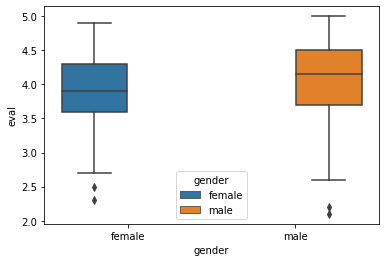

In [71]:
ax = sb.boxplot(x="gender", y="eval", hue="gender", data=ratings_df)
plt.show()

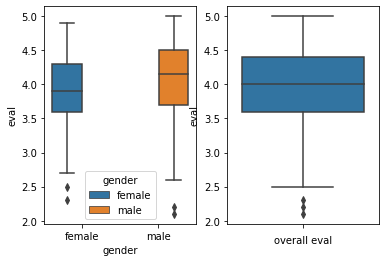

In [121]:
plot = plt.subplot(1,2,1)
ax = sb.boxplot(x='gender', y="eval", hue="gender", data=ratings_df)

plot = plt.subplot(1,2,2)
ax = sb.boxplot( y="eval", hue="gender", data=ratings_df)
ax.set_xlabel('overall eval')
plt.show()

#### Percentage difference of males mean 'eval' score relative to overall mean 'eval' score.

In [124]:
abs((ratings_df['eval'].mean() - ratings_df[ratings_df['gender']=='male']['eval'].mean()))/ratings_df['eval'].mean()

0.017697073373725794

#### Percentage difference of females mean 'eval' score relative to overall mean 'eval' score.

In [125]:
abs((ratings_df['eval'].mean() - ratings_df[ratings_df['gender']=='female']['eval'].mean()))/ratings_df['eval'].mean()

0.02432213161106922

#### Percentage difference of females mean 'eval' score relative to male mean 'eval' score.

In [137]:
abs((ratings_df[ratings_df['gender']=='male']['eval'].mean() - 
     ratings_df[ratings_df['gender']=='female']['eval'].mean()))/ \
    ratings_df[ratings_df['gender']=='male']['eval'].mean()

0.041288519033958575

# Suggestions for next steps in analyzing this data

- The independent features need to be transformed since they are not linearly distributed.</br>
- Further we can proceed to know how tenure & non-tenure teachers 'eval' scores are dependent.</br>
- Categorical variables test statistics need to be performed in order to know the associations between categorical features.
- Correlation tests need to be performed to know & eliminate unwanted features.

# A paragraph that summarizes the quality of this data set and a request for additional data if needed

The data collected is found to be good without any missing features or observations. Additional data is not required just for evaluation of teachers performance. However the data collected from students need to be averaged on more number of students.